# How are in-demand skills trending for Data Analysts

## Methology

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [18]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

# Loading dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [19]:
df_analysts = df[df['job_title_short'] == 'Data Analyst'].copy()

In [20]:
df_analysts['job_posted_month_no'] = df_analysts['job_posted_date'].dt.month

In [21]:
df_analysts_explode = df_analysts.explode('job_skills').copy()

In [22]:
df_pivot = df_analysts_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_pivot.loc['Total'] = df_pivot.sum()

df_pivot = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index]

df_pivot = df_pivot.drop('Total')

df_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_analysts_total = df_analysts.groupby('job_posted_month_no').size()
df_analysts_total

job_posted_month_no
1     23585
2     16558
3     16243
4     15514
5     13423
6     16008
7     16095
8     18628
9     14969
10    16239
11    15230
12    13583
dtype: int64

In [24]:
df_perc = df_pivot.div(df_analysts_total/100, axis=0)

In [25]:
df_perc = df_perc.reset_index()
df_perc['job_posted_month'] = df_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_perc = df_perc.set_index('job_posted_month')
df_perc = df_perc.drop(columns='job_posted_month_no')

df_perc

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,48.064448,34.640661,28.009328,23.726945,18.168327,15.293619,16.239135,7.971168,7.538690,5.304219,...,0.00848,0.000000,0.000000,0.00424,0.000000,0.000000,0.000000,0.00424,0.000000,0.00000
Feb,47.994927,34.859283,28.693079,23.770987,19.972219,15.557434,15.907718,7.796835,7.458630,5.761565,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
Mar,48.439328,34.938127,29.187958,24.939974,19.553038,16.314720,15.723696,7.794127,7.406267,5.491596,...,0.00000,0.006156,0.000000,0.00000,0.000000,0.000000,0.006156,0.00000,0.000000,0.00000
Apr,48.685059,35.426067,29.373469,24.339306,20.020627,15.463452,16.746165,7.670491,7.586696,6.104164,...,0.00000,0.000000,0.000000,0.00000,0.006446,0.000000,0.000000,0.00000,0.000000,0.00000
May,49.295985,35.558370,30.321091,24.174924,20.077479,15.592639,14.452805,7.293452,7.129554,6.339864,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00745
Jun,47.376312,35.757121,29.404048,23.813093,20.458521,15.254873,13.580710,7.327586,7.727386,6.165667,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
Jul,47.760174,34.252874,30.015533,24.405095,20.813917,15.184840,13.159366,6.809568,6.641814,6.188257,...,0.00000,0.000000,0.006213,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
Aug,47.364183,34.797080,29.933434,24.334335,20.716126,15.970582,13.742753,7.150526,6.968005,5.996350,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
Sep,45.620950,32.640791,28.251720,23.020910,20.829715,14.336295,12.559289,6.306366,6.313047,5.691763,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000


Text(0, 0.5, 'Likelihood in Job Postings')

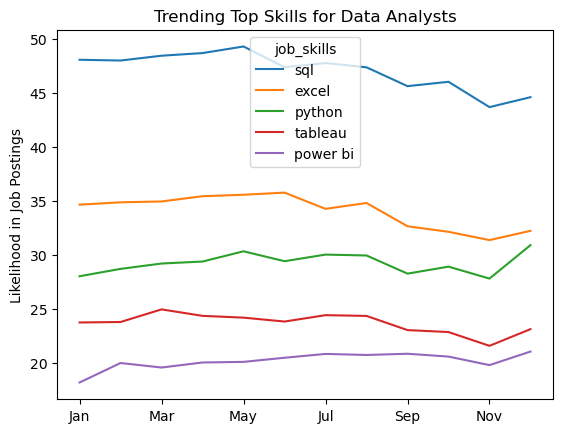

In [33]:
df_plot = df_perc.iloc[:, :5].plot(kind="line")
plt.title("Trending Top Skills for Data Analysts")
plt.xlabel('')
plt.ylabel("Likelihood in Job Postings")